<a href="https://colab.research.google.com/github/Mateus-Brandao/Data-Science/blob/main/Var%C3%ADola_macaco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neste relatório foram analisados os casos de varíola em diferentes países do mundo até o dia 29/07/2022.

## Depois de analizados os dados, foram respondidas as seguintes perguntas:


1. **Qual o país com mais casos acumulados no mundo?**

 Os Estados Unidos é o país com mais casos acumulados, totalizando 4630 casos.

2. **Qual o país com menos casos acumulados no mundo?**

 Barbados é o país com menos casos acumulados, com apenas 1 caso.

3. **Qual o país com mais casos contabilizados em um dia?**

  Os Estados Unidos é o país com mais casos diários, com um total de 981 casos, registrados no dia 27/07/2022.

4. **Qual a quantidade de casos acumulados no Brasil?**

 O Brasil possui 978 casos acumulados, registrados no dia 27/07/2022.

5. **Qual a maior quantidade de casos diários no Brasil?**

 O Brasil possui o máximo de 143 casos diários, registrados no dia 20/07/2022.

6. **Qual foi o dia com mais registros de casos no mundo?**

 Foi o dia 19/07/2022, com 1475 casos registrados ao redor do mundo.

7. **Onde e quando aconteceram os primeiros casos?**

 Os 3 primeiros casos foram registrados na Nigéria, no dia 31/01/2022.

# Tratamento e análise exploratória dos dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv('timeseries-country-confirmed.csv')
dados.head()

,Date,Cases,Cumulative_cases,Country
0,2022-07-25,1,1,Andorra
1,2022-07-26,2,3,Andorra
2,2022-07-27,0,3,Andorra
3,2022-07-28,0,3,Andorra
4,2022-07-29,0,3,Andorra


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3974 entries, 0 to 3973
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              3974 non-null   object
 1   Cases             3974 non-null   int64 
 2   Cumulative_cases  3974 non-null   int64 
 3   Country           3974 non-null   object
dtypes: int64(2), object(2)
memory usage: 124.3+ KB


In [5]:
dados['Date'] = pd.to_datetime(dados['Date'], format = '%Y-%m-%d')
dados.head()

,Date,Cases,Cumulative_cases,Country
0,2022-07-25,1,1,Andorra
1,2022-07-26,2,3,Andorra
2,2022-07-27,0,3,Andorra
3,2022-07-28,0,3,Andorra
4,2022-07-29,0,3,Andorra


In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3974 entries, 0 to 3973
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              3974 non-null   datetime64[ns]
 1   Cases             3974 non-null   int64         
 2   Cumulative_cases  3974 non-null   int64         
 3   Country           3974 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 124.3+ KB


In [7]:
dados = dados.rename(columns = {'Date':'Data','Cases':'Casos_diarios','Cumulative_cases':'Casos_acumulados','Country':'Pais'})
dados.head()

,Data,Casos_diarios,Casos_acumulados,Pais
0,2022-07-25,1,1,Andorra
1,2022-07-26,2,3,Andorra
2,2022-07-27,0,3,Andorra
3,2022-07-28,0,3,Andorra
4,2022-07-29,0,3,Andorra


In [51]:
casos_acumulados_pais = dados.groupby('Pais')['Casos_acumulados'].max()
casos_acumulados_pais = pd.DataFrame(casos_acumulados_pais)
casos_acumulados_pais.reset_index(inplace=True)
casos_acumulados_pais.head()

,Pais,Casos_acumulados
0,Andorra,3
1,Argentina,20
2,Australia,44
3,Austria,99
4,Barbados,1


In [52]:
casos_acumulados_pais.iloc[casos_acumulados_pais['Casos_acumulados'].idxmax()]

Pais                United States
Casos_acumulados             4630
Name: 77, dtype: object

Os Estados Unidos é o país com mais casos acumulados, totalizando 4630 casos.

In [53]:
casos_acumulados_pais.iloc[casos_acumulados_pais['Casos_acumulados'].idxmin()]

Pais                Barbados
Casos_acumulados           1
Name: 4, dtype: object

Barbados é o país com menos casos acumulados, com apenas 1 caso.

In [10]:
dados.iloc[dados['Casos_diarios'].idxmax()]

Data                2022-07-27 00:00:00
Casos_diarios                       981
Casos_acumulados                   4630
Pais                      United States
Name: 3923, dtype: object

Os Estados Unidos é o país com mais casos diários, com um total de 981 casos, registrados no dia 27/07/2022.

In [48]:
dados_brasil = dados.query('Pais == "Brazil"')
dados_brasil.reset_index(inplace = True)
dados_brasil = dados_brasil.drop(columns = ['index'])
dados_brasil.head()

,Data,Casos_diarios,Casos_acumulados,Pais
0,2022-06-08,1,1,Brazil
1,2022-06-09,0,1,Brazil
2,2022-06-10,0,1,Brazil
3,2022-06-11,1,2,Brazil
4,2022-06-12,1,3,Brazil


In [26]:
dados_brasil.iloc[dados_brasil['Casos_acumulados'].idxmax()]

Data                2022-07-27 00:00:00
Casos_diarios                       112
Casos_acumulados                    978
Pais                             Brazil
Name: 49, dtype: object

O Brasil possui um total de 978 casos acumulados, registrado no dia 27/07/2022.

In [27]:
dados_brasil.iloc[dados_brasil['Casos_diarios'].idxmax()]

Data                2022-07-20 00:00:00
Casos_diarios                       143
Casos_acumulados                    592
Pais                             Brazil
Name: 42, dtype: object

O Brasil possui o máximo de 143 casos diários, registrados no dia 20/07/2022.

In [94]:
dados_diarios = dados.groupby('Data')[['Casos_diarios','Casos_acumulados']].sum()
dados_diarios = dados_diarios.reset_index()
dados_diarios.head()

,Data,Casos_diarios,Casos_acumulados
0,2022-01-31,3,3
1,2022-02-01,0,3
2,2022-02-02,0,3
3,2022-02-03,0,3
4,2022-02-04,0,3


In [95]:
dados_diarios.iloc[dados_diarios['Casos_diarios'].idxmax()]

Data                2022-07-19 00:00:00
Casos_diarios                      1475
Casos_acumulados                  15073
Name: 169, dtype: object

O dia com mais casos foi 19/07/2022, com 1475 casos registrados.

In [99]:
dados.query('Data == "2022-01-31"')

,Data,Casos_diarios,Casos_acumulados,Pais
2508,2022-01-31,3,3,Nigeria


Os 3 primeiros casos foram registrados dia 31/01/2022 na Nigéria.

# Visualização através de gráficos

In [43]:
casos_acumulados_mundo = dados.groupby('Data')['Casos_acumulados'].sum()
casos_acumulados_mundo = pd.DataFrame(casos_acumulados_mundo)
casos_acumulados_mundo.reset_index(inplace=True)
casos_acumulados_mundo.head()

,Data,Casos_acumulados
0,2022-01-31,3
1,2022-02-01,3
2,2022-02-02,3
3,2022-02-03,3
4,2022-02-04,3


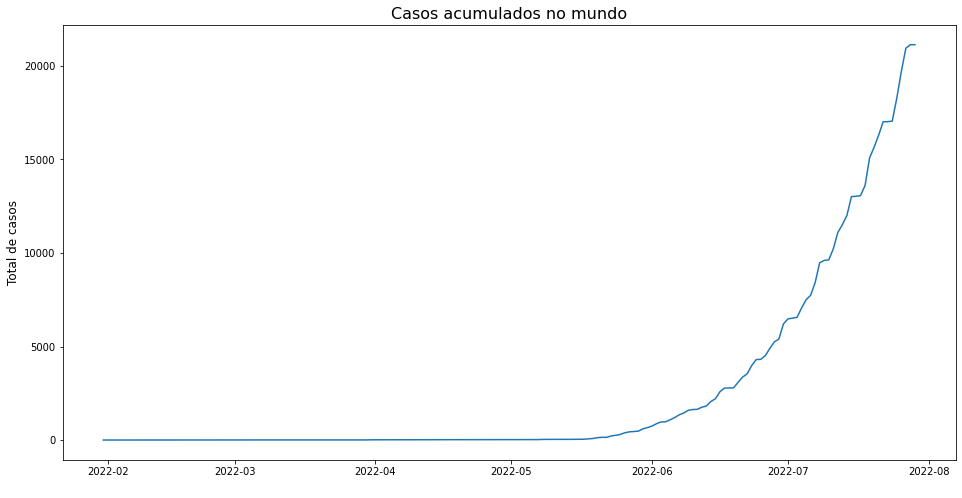

In [44]:
plt.figure(figsize=(16,8))
ax = sns.lineplot(data = casos_acumulados_mundo, x = 'Data', y = 'Casos_acumulados')
plt.title('Casos acumulados no mundo', fontsize = 16)
plt.xlabel(' ')
plt.ylabel('Total de casos', fontsize = 12)
plt.show()

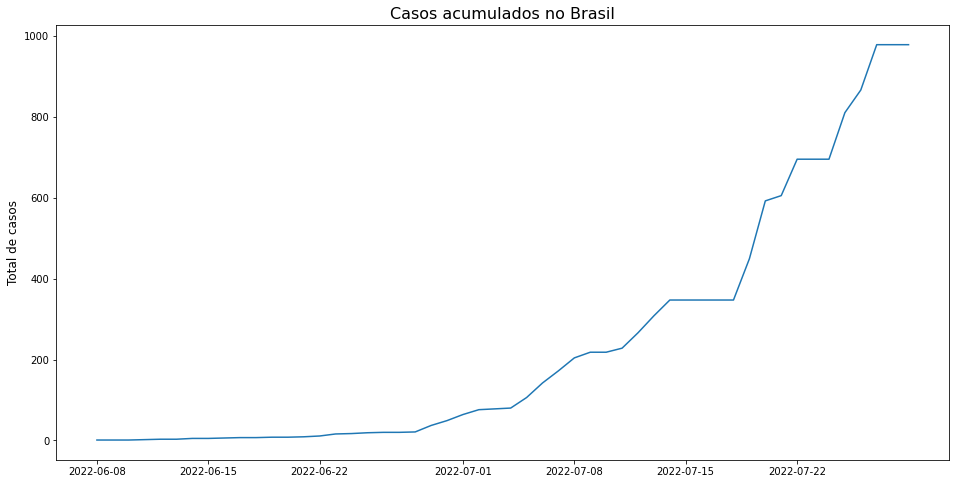

In [89]:
plt.figure(figsize=(16,8))
ax = sns.lineplot(data = dados_brasil, x = 'Data', y = 'Casos_acumulados')
plt.title('Casos acumulados no Brasil', fontsize = 16)
plt.xlabel(' ')
plt.ylabel('Total de casos', fontsize = 12)
plt.show()

In [47]:
dados_EUA = dados.query('Pais == "United States"')
dados_EUA.reset_index(inplace = True)
dados_EUA = dados_EUA.drop(columns = ['index'])
dados_EUA.head()

,Data,Casos_diarios,Casos_acumulados,Pais
0,2022-05-18,1,1,United States
1,2022-05-19,1,2,United States
2,2022-05-20,0,2,United States
3,2022-05-21,0,2,United States
4,2022-05-22,0,2,United States


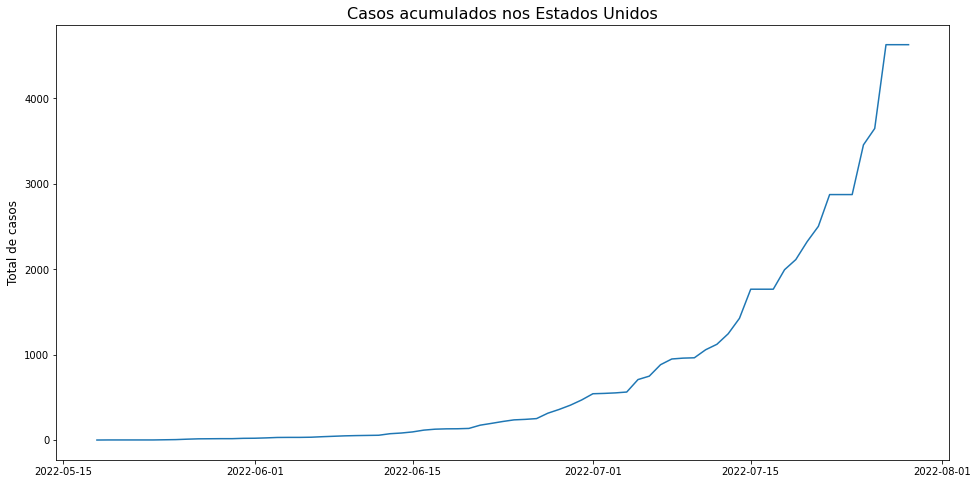

In [90]:
plt.figure(figsize=(16,8))
ax = sns.lineplot(data = dados_EUA, x = 'Data', y = 'Casos_acumulados')
plt.title('Casos acumulados nos Estados Unidos', fontsize = 16)
plt.xlabel(' ')
plt.ylabel('Total de casos', fontsize = 12)
plt.show()

In [54]:
casos_diarios_maximos_pais = dados.groupby('Pais')['Casos_diarios'].max()
casos_diarios_maximos_pais = pd.DataFrame(casos_diarios_maximos_pais)
casos_diarios_maximos_pais.reset_index(inplace=True)
casos_diarios_maximos_pais.head()

,Pais,Casos_diarios
0,Andorra,2
1,Argentina,5
2,Australia,8
3,Austria,25
4,Barbados,1


In [63]:
top_5_casos_diarios = casos_diarios_maximos_pais.sort_values("Casos_diarios", ascending=False).head()
top_5_casos_diarios

,Pais,Casos_diarios
77,United States,981
69,Spain,776
26,France,525
76,United Kingdom,281
28,Germany,145


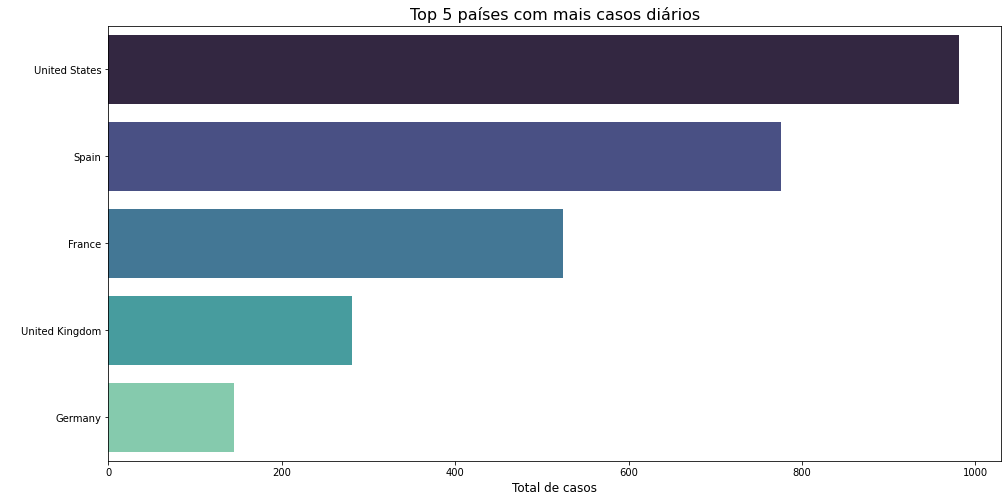

In [88]:
plt.figure(figsize=(16,8))
sns.barplot(data = top_5_casos_diarios, y = 'Pais', x = 'Casos_diarios', palette = "mako")
plt.title('Top 5 países com mais casos diários', fontsize = 16)
plt.xlabel('Total de casos', fontsize = 12)
plt.ylabel(' ')
plt.show()

In [78]:
top_5_casos_acumulados = casos_acumulados_pais.sort_values("Casos_acumulados", ascending=False).head()
top_5_casos_acumulados

,Pais,Casos_acumulados
77,United States,4630
69,Spain,3738
28,Germany,2540
76,United Kingdom,2432
26,France,1829


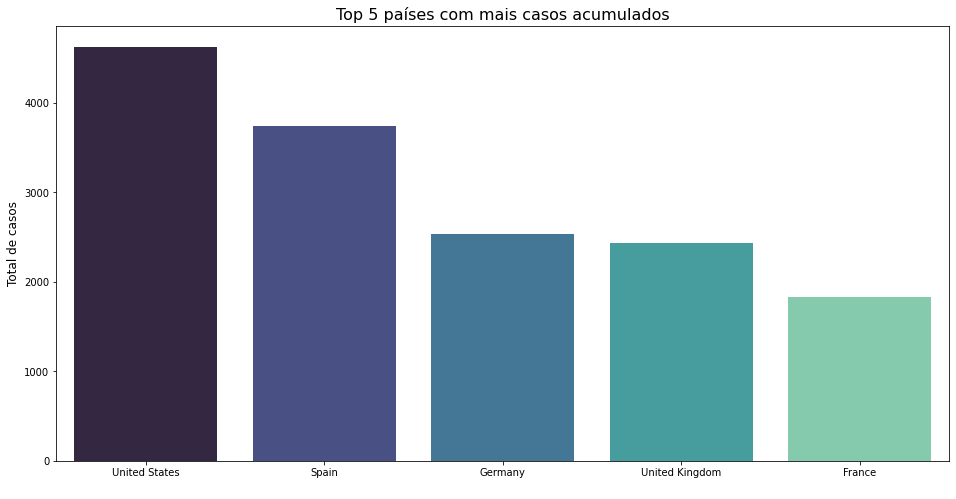

In [84]:
plt.figure(figsize=(16,8))
sns.barplot(data = top_5_casos_acumulados, x = 'Pais', y = 'Casos_acumulados', palette = "mako")
plt.title('Top 5 países com mais casos acumulados', fontsize = 16)
plt.xlabel(' ')
plt.ylabel('Total de casos', fontsize = 12)
plt.show()